In [1]:
import os
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')

In [2]:
#seeds:
np.random.seed(123)
tf.random.set_seed(123)

# Data Loading

In [3]:
artist_df = pd.read_csv('./Data/artists.csv', sep=",")
print("The number of painting is {}.".format(artist_df.shape[0]))

The number of painting is 50.


In [4]:
artist_df

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194
5,5,Salvador Dali,1904 - 1989,Surrealism,Spanish,Salvador Domingo Felipe Jacinto Dalí i Domènec...,http://en.wikipedia.org/wiki/Salvador_Dalí,139
6,6,Edouard Manet,1832 - 1883,"Realism,Impressionism",French,Édouard Manet (US: ; UK: ; French: [edwaʁ manɛ...,http://en.wikipedia.org/wiki/Édouard_Manet,90
7,7,Andrei Rublev,1360 - 1430,Byzantine Art,Russian,"Andrei Rublev (Russian: Андре́й Рублёв, IPA: [...",http://en.wikipedia.org/wiki/Andrei_Rublev,99
8,8,Vincent van Gogh,1853 – 1890,Post-Impressionism,Dutch,Vincent Willem van Gogh (Dutch: [ˈvɪnsɛnt ˈʋɪl...,http://en.wikipedia.org/wiki/Vincent_van_Gogh,877
9,9,Gustav Klimt,1862 - 1918,"Symbolism,Art Nouveau",Austrian,"Gustav Klimt (July 14, 1862 – February 6, 1918...",http://en.wikipedia.org/wiki/Gustav_Klimt,117


In [5]:
images_dir = './Data/resized'
artists_dirs = list(set([" ".join(filename.split("_")[:-1]) for filename in os.listdir(images_dir)])) #get all names from /resized
n_classes = len(artists_dirs)
print(artists_dirs)

['Kazimir Malevich', 'Amedeo Modigliani', 'Pierre-Auguste Renoir', 'Vasiliy Kandinskiy', 'Leonardo da Vinci', 'Joan Miro', 'Pieter Bruegel', 'Rembrandt', 'Henri de Toulouse-Lautrec', 'Edouard Manet', 'Peter Paul Rubens', 'Paul Gauguin', 'Claude Monet', 'Paul Cezanne', 'Salvador Dali', 'Frida Kahlo', 'Raphael', 'Gustav Klimt', 'Sandro Botticelli', 'Henri Matisse', 'Andy Warhol', 'El Greco', 'Titian', 'Camille Pissarro', 'Diego Velazquez', 'Rene Magritte', 'Mikhail Vrubel', 'Michelangelo', 'Jan van Eyck', 'Giotto di Bondone', 'Hieronymus Bosch', 'Vincent van Gogh', 'Edgar Degas', 'Henri Rousseau', 'Albrecht Dürer', 'Francisco Goya', 'William Turner', 'Marc Chagall', 'Andrei Rublev', 'Edvard Munch', 'Paul Klee', 'Georges Seurat', 'Alfred Sisley', 'Gustave Courbet', 'Diego Rivera', 'Pablo Picasso', 'Jackson Pollock', 'Eugene Delacroix', 'Caravaggio', 'Piet Mondrian', 'Albrecht Du╠êrer']


In [6]:
print(len(artists_dirs))

51


In [7]:
# Correct the data quality issue with Albrecht Dürer
artists_dirs.remove('Albrecht Du╠êrer')

In [8]:
print(len(artists_dirs))

50


# Data Visualization

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


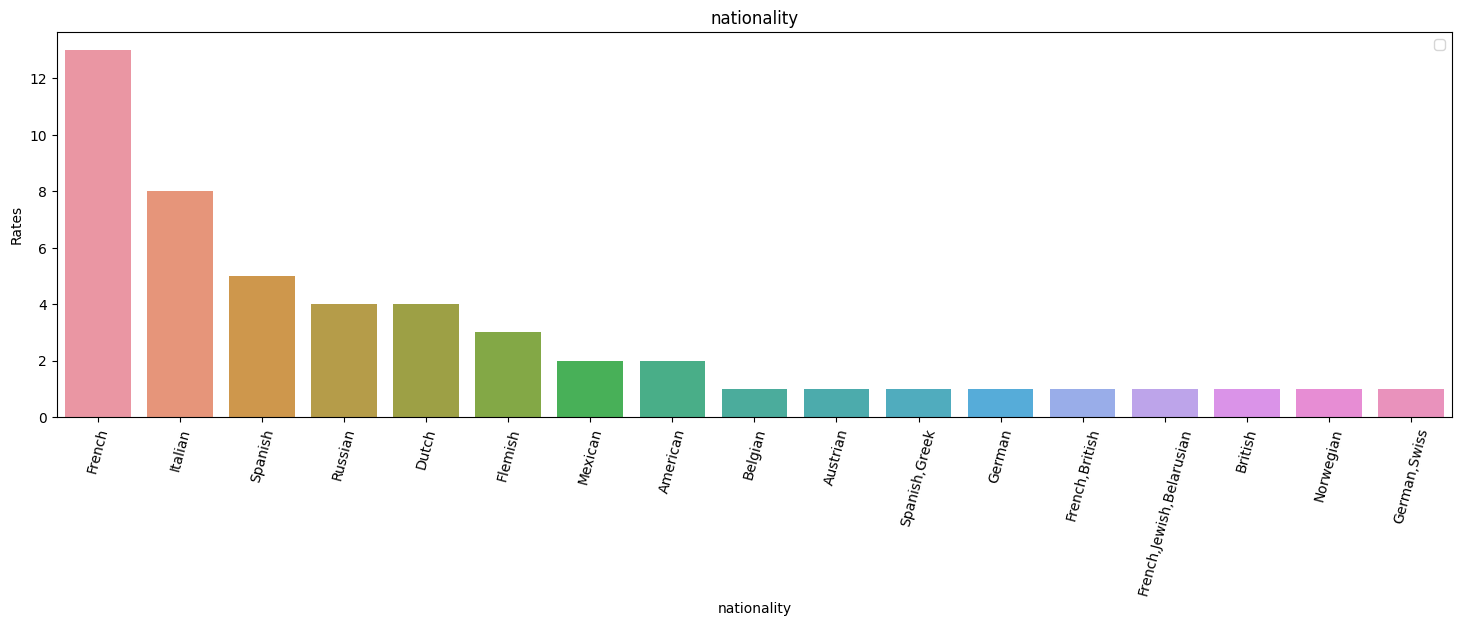

In [9]:
plt.figure(figsize=(18,5))

sns.barplot(x=artist_df['nationality'].value_counts().index,y=artist_df['nationality'].value_counts().values)
plt.title('nationality')
plt.xticks(rotation=75)
plt.ylabel('Rates')
plt.legend(loc=0)
plt.show()

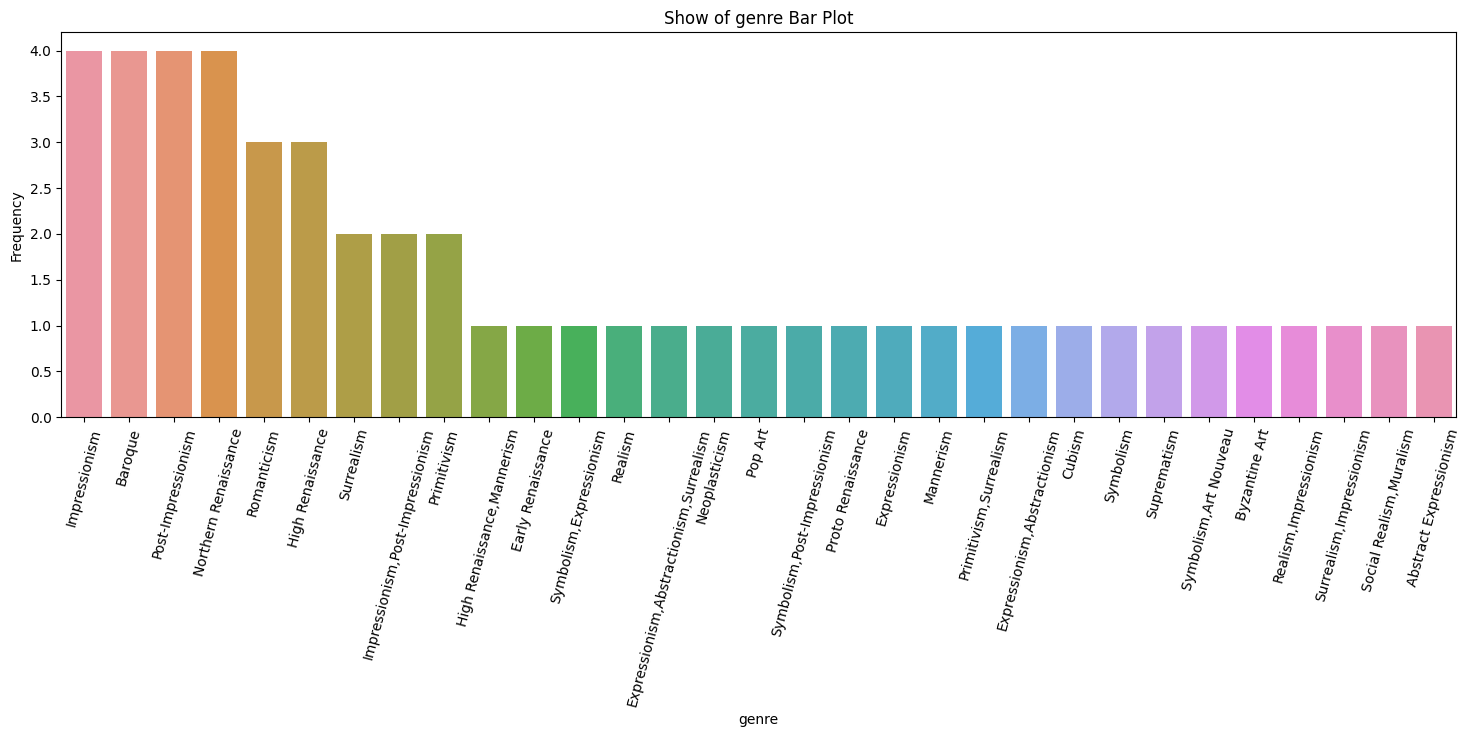

In [10]:
plt.figure(figsize=(18,5))
sns.barplot(x=artist_df['genre'].value_counts().index,
              y=artist_df['genre'].value_counts().values)
plt.xlabel('genre')
plt.xticks(rotation=75)
plt.ylabel('Frequency')
plt.title('Show of genre Bar Plot')
plt.show()

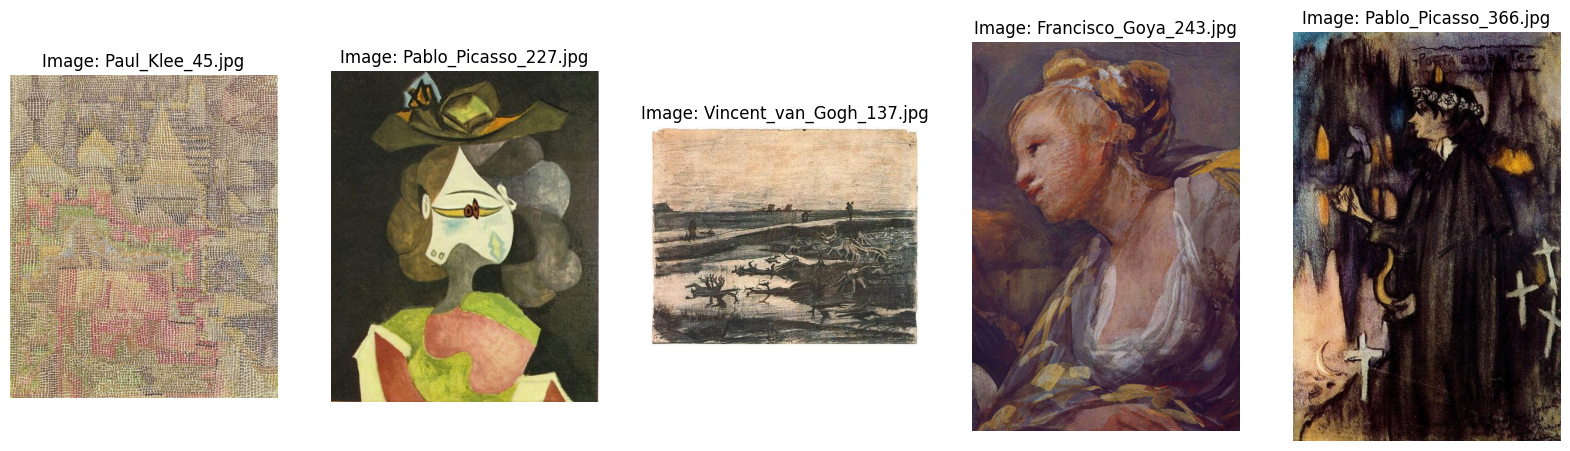

In [11]:
fig, axes = plt.subplots(1, 5, figsize=(20,10))

for i in range(5):
    random_image = random.choice(os.listdir(os.path.join(images_dir)))
    random_image_file = os.path.join(images_dir, random_image)
    image = plt.imread(random_image_file)
    axes[i].imshow(image)
    axes[i].set_title("Image: " + random_image)
    axes[i].axis('off')

plt.show()

# Train and Test Split

In [12]:
# Create a DataFrame to store filename and artist mapping
file_artist_mapping = []

for filename in os.listdir(images_dir):
    if filename.endswith(('.png', '.jpg', '.jpeg')):
        artist_name = " ".join(filename.split("_")[:-1])
        file_artist_mapping.append({'filename': filename, 'artist': artist_name})

df = pd.DataFrame(file_artist_mapping)

# Remove rows where the artist is 'Albrecht Du╠êrer'
df = df[df['artist'] != 'Albrecht Du╠êrer']

# Get unique artist names
artists = df['artist'].unique()
n_classes = len(artists)

# Define image size and other parameters
img_size = (128, 128)
batch_size = 32

# Create data generators
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=images_dir,
    x_col='filename',
    y_col='artist',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=images_dir,
    x_col='filename',
    y_col='artist',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 6684 validated image filenames belonging to 50 classes.
Found 1671 validated image filenames belonging to 50 classes.


# Simple CNN Model

In [13]:
def simple_cnn():
    
    # Build a simple CNN model
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(n_classes, activation='softmax'))

    return model

In [17]:
#Initialize model
model= simple_cnn()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

Epoch 1/20
209/209 [==============================] - 22s 102ms/step - loss: 3.5730 - accuracy: 0.1227 - val_loss: 3.3033 - val_accuracy: 0.1370
Epoch 2/20
209/209 [==============================] - 21s 101ms/step - loss: 3.2867 - accuracy: 0.1891 - val_loss: 3.0824 - val_accuracy: 0.2118
Epoch 3/20
209/209 [==============================] - 21s 101ms/step - loss: 3.1927 - accuracy: 0.2249 - val_loss: 2.9186 - val_accuracy: 0.2507
Epoch 4/20
209/209 [==============================] - 21s 101ms/step - loss: 3.1365 - accuracy: 0.2371 - val_loss: 3.0410 - val_accuracy: 0.2316
Epoch 5/20
209/209 [==============================] - 21s 101ms/step - loss: 3.1563 - accuracy: 0.2545 - val_loss: 2.8887 - val_accuracy: 0.2591
Epoch 6/20
209/209 [==============================] - 21s 101ms/step - loss: 3.0623 - accuracy: 0.2709 - val_loss: 3.1256 - val_accuracy: 0.2537
Epoch 7/20
209/209 [==============================] - 21s 102ms/step - loss: 3.3467 - accuracy: 0.2702 - val_loss: 3.7122 - val_ac

In [18]:
# Prediction accuracy on train data
score = model.evaluate_generator(train_generator, verbose=1)
print("Prediction accuracy on train data =", score[1])

209/209 [==============================] - 17s 81ms/step - loss: 48.3209 - accuracy: 0.3655
Prediction accuracy on train data = 0.36549973487854004


In [19]:
# Prediction accuracy on CV data
score = model.evaluate_generator(validation_generator, verbose=1)
print("Prediction accuracy on CV data =", score[1])

53/53 [==============================] - 4s 75ms/step - loss: 75.5096 - accuracy: 0.2430
Prediction accuracy on CV data = 0.24296829104423523


# Data Augmentation

In [20]:
# Create a data generator with data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=images_dir,
    x_col='filename',
    y_col='artist',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=df,
    directory=images_dir,
    x_col='filename',
    y_col='artist',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 6684 validated image filenames belonging to 50 classes.
Found 1671 validated image filenames belonging to 50 classes.


In [21]:
model= simple_cnn()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

Epoch 1/20
209/209 [==============================] - 33s 156ms/step - loss: 3.6140 - accuracy: 0.1180 - val_loss: 3.3835 - val_accuracy: 0.1652
Epoch 2/20
209/209 [==============================] - 32s 151ms/step - loss: 3.3353 - accuracy: 0.1680 - val_loss: 3.1658 - val_accuracy: 0.1867
Epoch 3/20
209/209 [==============================] - 31s 151ms/step - loss: 3.2058 - accuracy: 0.2072 - val_loss: 3.0515 - val_accuracy: 0.2202
Epoch 4/20
209/209 [==============================] - 31s 148ms/step - loss: 3.1237 - accuracy: 0.2261 - val_loss: 2.9329 - val_accuracy: 0.2442
Epoch 5/20
209/209 [==============================] - 31s 148ms/step - loss: 3.0829 - accuracy: 0.2407 - val_loss: 2.8972 - val_accuracy: 0.2424
Epoch 6/20
209/209 [==============================] - 32s 151ms/step - loss: 3.0216 - accuracy: 0.2539 - val_loss: 2.8473 - val_accuracy: 0.2501
Epoch 7/20
209/209 [==============================] - 31s 148ms/step - loss: 3.0006 - accuracy: 0.2591 - val_loss: 2.8101 - val_ac

In [22]:
# Prediction accuracy on train data
score = model.evaluate_generator(train_generator, verbose=1)
print("Prediction accuracy on train data =", score[1])

209/209 [==============================] - 25s 121ms/step - loss: 3.3726 - accuracy: 0.3507
Prediction accuracy on train data = 0.35068821907043457


In [23]:
# Prediction accuracy on CV data
score = model.evaluate_generator(validation_generator, verbose=1)
print("Prediction accuracy on CV data =", score[1])

53/53 [==============================] - 6s 116ms/step - loss: 3.9820 - accuracy: 0.2675
Prediction accuracy on CV data = 0.2675045132637024
